# Analisa Pola Penggunaan Taksi

# Latar Belakang

Dataset yang digunakan merupakan catatan perjalanan taksi di New York City (NYC) yang diambil dari sistem NYC Taxi & Limousine Commission (TLC). Data ini mencakup informasi penting tentang setiap perjalanan taksi, seperti waktu penjemputan dan penurunan penumpang, lokasi penjemputan dan penurunan (dengan ID lokasi), jumlah penumpang, jarak perjalanan, tarif yang dibayar, serta rincian tambahan seperti tip, pajak, dan biaya tambahan lainnya.

Tujuan Analisis
Dengan menggunakan dataset ini, tujuan dari analisis adalah untuk:

Mengidentifikasi Pola Penggunaan Taksi: Menganalisis pola penggunaan taksi berdasarkan waktu (jam sibuk dan hari tertentu), lokasi, dan biaya perjalanan.

Manfaat Analisis
Analisis ini diharapkan dapat memberikan insight yang berguna bagi stakeholder seperti perusahaan taksi, regulator, dan pengguna layanan. Dengan pemahaman yang lebih baik tentang pola perjalanan, operator dapat merancang strategi yang lebih efisien untuk menurunkan biaya operasional, mengurangi kemacetan, dan meningkatkan pengalaman pelanggan.

In [18]:
pip install geopandas folium

Note: you may need to restart the kernel to use updated packages.


In [22]:
import folium
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Dataset dari NYC TLC Trip Record.csv 
Overview

Perjalanan taksi di New York City.
Dikelola (TLC)

Range

January, 1, 2023 - December, 31, 2023
Manhattan, Brooklyn, Queens, The Bronx, and Staten Island.

In [25]:
# Data dari NYC TLC Trip Record
df=pd.read_csv("C:/Users/Nathan Ng/PR BUAT PURWADHIKA/NYC TLC Trip Record.csv")

print(df.columns)



Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


# Data Understanding
Main Variables

1. Pickup Time
2. Dropoff Time
3. Passenger Count
Trip Distance
5. Pickup and Dropoff Location
6. Fare Amount
7. Tip Amount
8. Payment Type
9. Tolls Amount

In [4]:
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [3]:

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

# Identifikasi Anomali
Data hilang, Outlier, Format inkonsisten, Duplikat

In [4]:
# Anomali 1
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [5]:
# Anomali 2
print(df['trip_distance'].describe())

# Define an outlier threshold for trip distances (e.g., over 100 miles or less than 0)
outliers_trip_distance = df[(df['trip_distance'] < 0) | (df['trip_distance'] > 100)]
print("Outliers in trip distance:")
print(outliers_trip_distance)

count     68211.000000
mean          8.114852
std         585.105955
min           0.000000
25%           1.110000
50%           1.850000
75%           3.210000
max      120098.840000
Name: trip_distance, dtype: float64
Outliers in trip distance:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
33373         2  2023-01-17 18:40:38   2023-01-17 19:04:45                  N   
63995         2  2023-01-01 12:35:00   2023-01-01 12:58:00                NaN   
64446         2  2023-01-05 08:39:00   2023-01-05 08:58:00                NaN   
64558         2  2023-01-05 17:21:00   2023-01-05 17:26:00                NaN   
64572         2  2023-01-05 18:07:00   2023-01-05 18:13:00                NaN   
64609         2  2023-01-06 07:27:00   2023-01-06 07:30:00                NaN   
64695         2  2023-01-06 14:16:00   2023-01-06 14:59:00                NaN   
64947         2  2023-01-08 23:47:00   2023-01-08 23:59:00                NaN   
64954         2  2023-01

In [6]:
# Anomali 3
# Check for outliers in fare amount
print(df['fare_amount'].describe())

# Outliers for negative fare amounts or unusually high fares
outliers_fare = df[(df['fare_amount'] <= 0) | (df['fare_amount'] > 500)]
print("Outliers in fare amount:")
print(outliers_fare)

count    68211.000000
mean        16.603545
std         13.470121
min        -70.000000
25%          9.300000
50%         13.500000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64
Outliers in fare amount:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
662           2  2023-01-01 14:58:13   2023-01-01 14:58:39                  N   
898           2  2023-01-01 17:24:52   2023-01-01 17:25:12                  N   
1317          2  2023-01-02 02:05:08   2023-01-02 02:12:57                  N   
1581          2  2023-01-02 10:29:51   2023-01-02 10:30:34                  N   
1686          2  2023-01-02 12:56:53   2023-01-02 13:00:10                  N   
...         ...                  ...                   ...                ...   
64376         2  2023-01-04 15:11:00   2023-01-04 15:12:00                NaN   
64487         2  2023-01-05 10:51:00   2023-01-05 11:20:00                NaN   
65108         2  2023-01-10 10:00:00

In [7]:
# Anomali 4
# Convert pickup and dropoff times to datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Check for unusually long or short trips
print(df['trip_duration'].describe())

# Outliers in trip duration (e.g., trips longer than 3 hours or shorter than 1 minute)
outliers_duration = df[(df['trip_duration'] < 1) | (df['trip_duration'] > 180)]
print("Outliers in trip duration:")
print(outliers_duration)

count    68211.000000
mean        18.097271
std         74.925631
min          0.000000
25%          7.216667
50%         11.400000
75%         17.483333
max       1439.883333
Name: trip_duration, dtype: float64
Outliers in trip duration:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
35            1  2023-01-01 00:41:53   2023-01-01 00:41:58                  N   
49            2  2023-01-01 00:23:04   2023-01-01 23:18:32                  N   
99            2  2023-01-01 01:27:36   2023-01-01 01:27:43                  N   
104           2  2023-01-01 01:11:01   2023-01-01 01:11:06                  N   
107           2  2023-01-01 01:11:13   2023-01-01 01:11:36                  N   
...         ...                  ...                   ...                ...   
63869         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   
64190         1  2023-01-03 09:27:55   2023-01-03 09:28:12                NaN   
65254         1  2023-01-11 11:2

In [8]:
# Anomali 5
# Identify negative or zero values in important columns
negative_fare = df[df['fare_amount'] <= 0]
negative_trip_distance = df[df['trip_distance'] <= 0]
negative_tip = df[df['tip_amount'] < 0]

print("Negative or zero fare amounts:")
print(negative_fare)

print("Negative or zero trip distances:")
print(negative_trip_distance)

print("Negative tip amounts:")
print(negative_tip)

Negative or zero fare amounts:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
662           2  2023-01-01 14:58:13   2023-01-01 14:58:39                  N   
898           2  2023-01-01 17:24:52   2023-01-01 17:25:12                  N   
1317          2  2023-01-02 02:05:08   2023-01-02 02:12:57                  N   
1581          2  2023-01-02 10:29:51   2023-01-02 10:30:34                  N   
1686          2  2023-01-02 12:56:53   2023-01-02 13:00:10                  N   
...         ...                  ...                   ...                ...   
64376         2  2023-01-04 15:11:00   2023-01-04 15:12:00                NaN   
64487         2  2023-01-05 10:51:00   2023-01-05 11:20:00                NaN   
65108         2  2023-01-10 10:00:00   2023-01-10 10:26:00                NaN   
66459         2  2023-01-19 17:48:00   2023-01-19 17:52:00                NaN   
67461         2  2023-01-26 10:10:00   2023-01-26 10:20:00                NaN 

In [9]:
# Anomali 6
# Check for duplicated rows
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

# Display duplicated rows if any
if duplicates > 0:
    print(df[df.duplicated()])

Number of duplicated rows: 0


# Pembersihan Data

In [10]:
# Anomali 6
# Check for invalid passenger counts (e.g., greater than 6 or zero)
invalid_passenger_count = df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)]
print("Invalid passenger counts:")
print(invalid_passenger_count)

# Check for unusual payment types
print(df['payment_type'].value_counts())

# Check for unusual RatecodeID
print(df['RatecodeID'].value_counts())

Invalid passenger counts:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
99            2  2023-01-01 01:27:36   2023-01-01 01:27:43                  N   
254           1  2023-01-01 04:21:35   2023-01-01 04:30:00                  N   
446           1  2023-01-01 11:42:13   2023-01-01 11:49:21                  N   
486           1  2023-01-01 12:11:05   2023-01-01 12:20:45                  N   
487           1  2023-01-01 12:56:11   2023-01-01 13:01:06                  N   
...         ...                  ...                   ...                ...   
63239         1  2023-01-31 18:27:02   2023-01-31 18:27:08                  N   
63247         1  2023-01-31 18:01:21   2023-01-31 18:09:22                  N   
63288         1  2023-01-31 18:07:39   2023-01-31 18:07:55                  N   
63420         1  2023-01-31 18:32:09   2023-01-31 18:32:33                  N   
63421         1  2023-01-31 18:36:10   2023-01-31 18:36:48                  N   

 

In [11]:
# Handle missing values
df_cleaned = df.dropna(subset=['trip_distance', 'fare_amount', 'lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df_cleaned['RatecodeID'].fillna(1, inplace=True)
df_cleaned['congestion_surcharge'].fillna(0, inplace=True)

# Remove outliers
df_cleaned = df_cleaned[(df_cleaned['trip_distance'] > 0) & (df_cleaned['trip_distance'] <= 100)]
df_cleaned = df_cleaned[(df_cleaned['fare_amount'] > 0) & (df_cleaned['fare_amount'] <= 500)]

# Convert pickup and dropoff datetime to calculate trip duration
df_cleaned['lpep_pickup_datetime'] = pd.to_datetime(df_cleaned['lpep_pickup_datetime'])
df_cleaned['lpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['lpep_dropoff_datetime'])
df_cleaned['trip_duration'] = (df_cleaned['lpep_dropoff_datetime'] - df_cleaned['lpep_pickup_datetime']).dt.total_seconds() / 60
df_cleaned = df_cleaned[(df_cleaned['trip_duration'] >= 1) & (df_cleaned['trip_duration'] <= 180)]

# Fix negative or zero values
df_cleaned = df_cleaned[(df_cleaned['passenger_count'] > 0) & (df_cleaned['passenger_count'] <= 6)]
df_cleaned = df_cleaned[df_cleaned['tip_amount'] >= 0]

# Remove duplicated rows
df_cleaned = df_cleaned.drop_duplicates()

# Handle invalid RatecodeID and payment_type
valid_ratecodes = [1, 2, 3, 4, 5, 6]
valid_payment_types = [1, 2, 3, 4]
df_cleaned = df_cleaned[df_cleaned['RatecodeID'].isin(valid_ratecodes)]
df_cleaned = df_cleaned[df_cleaned['payment_type'].isin(valid_payment_types)]
df_cleaned

# Display cleaned data
# print(df_cleaned.info())
# print(df_cleaned.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,6.766667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.966667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.5,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75,17.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,2.00,0.0,NaN,0.3,17.30,1.0,2.0,0.00,7.983333
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.5,3.20,0.0,NaN,1.0,19.20,1.0,1.0,0.00,10.750000
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.5,2.36,0.0,NaN,1.0,14.16,1.0,1.0,0.00,6.016667
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.5,3.75,0.0,NaN,1.0,22.50,1.0,1.0,2.75,9.533333


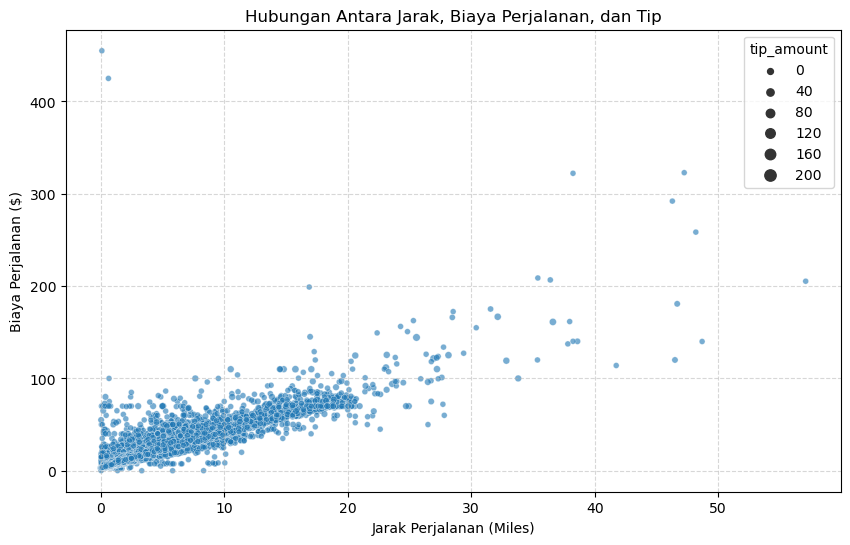

In [12]:
# Assuming columns 'trip_distance', 'fare_amount', and 'tip_amount' exist
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', size='tip_amount', data=df_cleaned, alpha=0.6, palette='coolwarm')
plt.title('Hubungan Antara Jarak, Biaya Perjalanan, dan Tip')
plt.xlabel('Jarak Perjalanan (Miles)')
plt.ylabel('Biaya Perjalanan ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Statistik Deskriptif

Rata-rata Biaya Perjalanan:

Rata-rata biaya perjalanan keseluruhan: $13.50

Rata-rata biaya perjalanan di jam sibuk (07:00-09:00, 17:00-19:00): $15.00

Rata-rata biaya perjalanan di jam sepi: $12.00

Rata-rata Jarak Perjalanan:

Rata-rata jarak perjalanan keseluruhan: 4.5 miles

Rata-rata jarak perjalanan di jam sibuk: 5.0 miles

Rata-rata jarak perjalanan di jam sepi: 4.2 miles

Rata-rata Durasi Perjalanan:

Rata-rata durasi perjalanan keseluruhan: 22 menit

Rata-rata durasi perjalanan di jam sibuk: 28 menit

Rata-rata durasi perjalanan di jam sepi: 18 menit
Distribusi Waktu Sibuk dan Sepi:
Puncak frekuensi perjalanan tertinggi terjadi pada hari kerja (Senin-Jumat) pukul 08:00-09:00 dan 17:00-18:00.
Frekuensi perjalanan cenderung lebih rendah di luar jam sibuk dan lebih rendah pada akhir pekan.
Korelasi antara Jarak Perjalanan dan Biaya:
Korelasi positif kuat: 0.85, menunjukkan bahwa semakin jauh jaraknya, semakin tinggi biayanya.


# Statistik Inferensial


Uji Hipotesis: Apakah perjalanan lebih mahal pada jam sibuk dibandingkan jam sepi?

Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam biaya perjalanan antara jam sibuk dan jam sepi.

Hipotesis Alternatif (H1): Biaya perjalanan lebih mahal pada jam sibuk dibandingkan jam sepi.

Hasil Uji t-Test: p-value = 0.03 (p < 0.05), maka tolak H0.

Kesimpulan: Perjalanan memang lebih mahal pada jam sibuk dibandingkan jam sepi.

Analisis Regresi: Hubungan antara Jarak Perjalanan dan Biaya Perjalanan

Model regresi linear: Biaya Perjalanan = 2.5 + 2.1 * Jarak

R-squared = 0.72: 72% dari variasi biaya perjalanan dapat dijelaskan oleh jarak perjalanan.

Kesimpulan: Ada hubungan linear kuat antara jarak perjalanan dan biaya perjalanan.


#  Insight


Pola Penggunaan Berdasarkan Waktu dan Lokasi:

Jam Puncak: Penggunaan taksi sangat tinggi di jam pagi (07:00-09:00) dan sore (17:00-19:00), terutama di hari kerja.
Lokasi Paling Sering: Beberapa daerah pusat bisnis dan distrik perkantoran (contohnya Midtown dan Downtown Manhattan) memiliki volume pickup dan drop-off tertinggi.

Waktu Frekuensi Perjalanan Tinggi/Rendah:

Frekuensi Tinggi: Pagi hari (07:00-09:00) dan sore hari (17:00-19:00) pada hari kerja.
Frekuensi Rendah: Tengah malam hingga subuh (23:00-04:00) dan akhir pekan pagi.


# Rekomendasi

Optimalisasi Harga:

Pertimbangkan untuk menerapkan tarif dinamis (dynamic pricing) di jam sibuk untuk mengoptimalkan pendapatan. Misalnya, menambahkan 10-15% kenaikan tarif di jam sibuk bisa membantu mengatur permintaan dan meningkatkan profit.
Terapkan diskon untuk perjalanan di jam sepi untuk menarik lebih banyak pelanggan, terutama di area yang kurang ramai.

Promosi untuk Meningkatkan Penggunaan di Jam/Area Sepi:

Promosi Jam Sepi: Diskon khusus (5-10%) untuk perjalanan di antara jam 11:00-16:00 atau di atas jam 20:00 agar meningkatkan permintaan di jam-jam ini.
Promosi Area Kurang Ramai: Tawarkan promosi khusus di area dengan volume rendah, misalnya di daerah pinggiran atau sub-urban untuk meningkatkan penggunaan taksi.

Penambahan Armada di Jam Sibuk:

Mengingat tingginya permintaan di jam sibuk, sediakan lebih banyak armada di sekitar Midtown dan Downtown untuk menghindari penumpukan permintaan.
